# Exercises

In [4]:
# connect to git to load all libraries and data

# get all files from the notebook here
!rm -rf population-methods-IT
!git clone https://github.com/irenetiem/population-methods-IT

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("population-methods/blob/main/02-SVM-decoding/code"))
# from utils import download_data

import urllib.request
from os import remove
import zipfile
from pathlib import Path
def download_data(url):

    if url.endswith('download'):
        URL = url
    else:
        URL = '/'.join((url, 'download'))

    if URL:
        response = urllib.request.urlopen(URL)
        data = response.read()
        response.close()

        with open('data.zip', 'wb') as f:
            f.write(data)

    with zipfile.ZipFile('data.zip', 'r') as zip_ref:
        zip_ref.extractall()

    remove('data.zip')

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})


#donwload lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/NrNbvEOH7SImYLn')

from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler

Cloning into 'population-methods-IT'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 296 (delta 75), reused 34 (delta 12), pack-reused 160 (from 1)
Receiving objects: 100% (296/296), 21.90 MiB | 21.24 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [6]:
# import data
with open('data/simulated_data1.pickle', 'rb') as handle:
    data = pickle.load(handle)

spike_times = data['spike_times']
stim_onsets = data['stim_onsets']
stim_type = data['stim_type']
stim_duration = data['stim_duration']

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

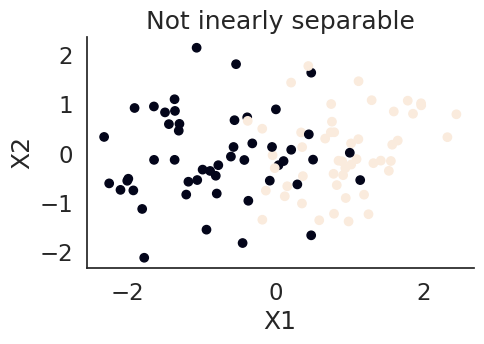

In [20]:
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)

X_sep,y_sep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.3,) # also this one for the y_sep

plt.figure(figsize=(5,3))
plt.title('Not inearly separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)
plt.show()

In [12]:
?svm.SVC

C : float, default=1.0
    Regularization parameter. The strength of the regularization is
    inversely proportional to C. Must be strictly positive. The penalty
    is a squared l2 penalty. For an intuitive visualization of the effects
    of scaling the regularization parameter C, see
    :ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.

In [27]:
# vary hyperparameter C for this data

C_list = [0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 20, 40, 70]

def plot_svm(C):
  plt.figure(figsize=(5,3))
  X,y = X_nsep,y_nsep
  svc_model = svm.SVC(kernel='linear',C=C);
  svc_model.fit(X, y)

  plt.scatter(X[:,0],X[:,1],c=y_nsep)
  # Constructing a hyperplane using a formula.
  w = svc_model.coef_[0]           # w consists of 2 elements
  b = svc_model.intercept_[0]      # b consists of 1 element
  x_points = np.linspace(-2,2)    # generating x-points from -1 to 1
  y_points = -(w[0] / w[1]) * x_points - b / w[1]
  plt.plot(x_points, y_points, c='r');
  plt.scatter(svc_model.support_vectors_[:, 0],
              svc_model.support_vectors_[:, 1],
              s=50,
              c='k',
              marker='x');
  w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
  margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
  decision_boundary_points = np.array(list(zip(x_points, y_points)))
  points_of_line_above = decision_boundary_points + w_hat * margin
  points_of_line_below = decision_boundary_points - w_hat * margin
  plt.plot(points_of_line_above[:, 0],
          points_of_line_above[:, 1],
          'b--')
  plt.plot(points_of_line_below[:, 0],
          points_of_line_below[:, 1],
          'g--')
  plt.ylim([min(X[:,1]),max(X[:,1])])
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title(f'C = {C}')
  plt.show()

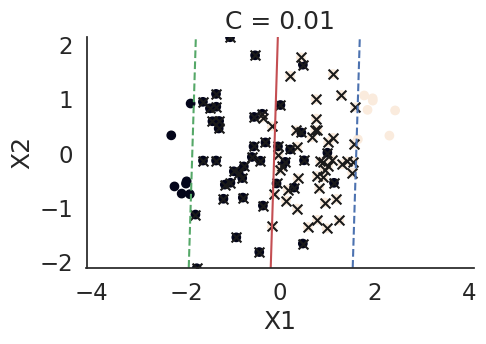

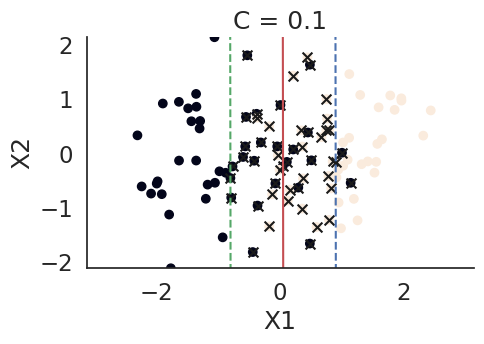

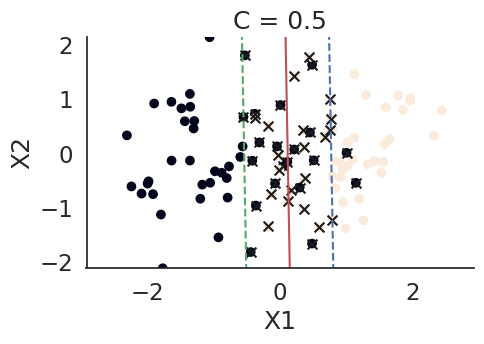

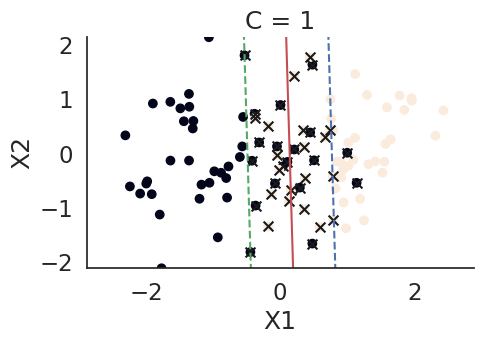

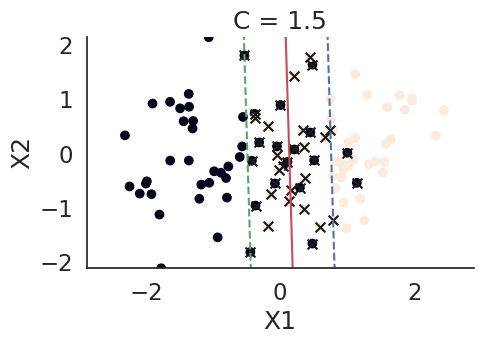

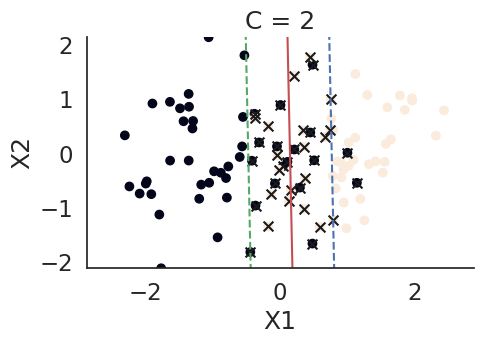

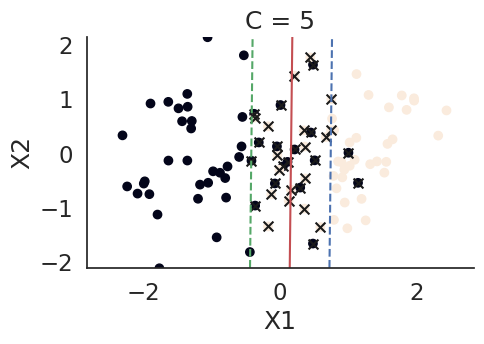

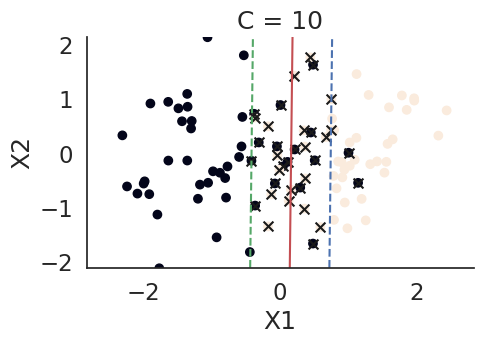

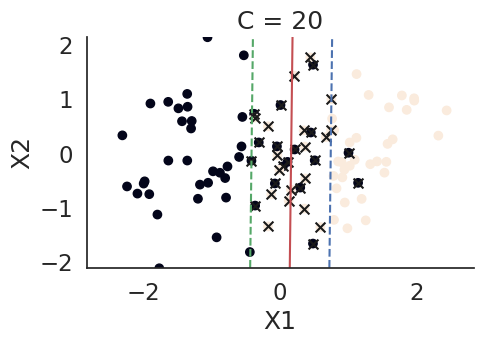

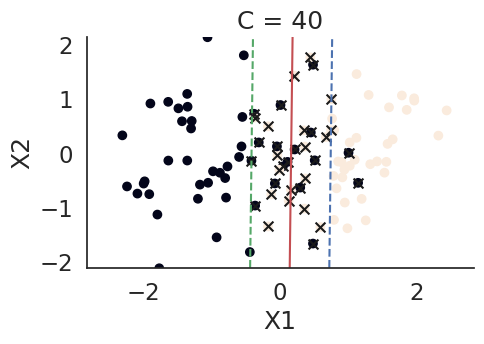

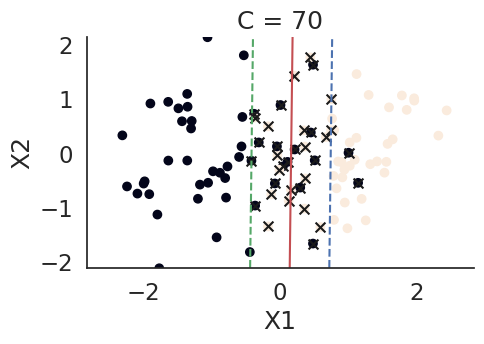

In [28]:
for C in C_list:
  plot_svm(C)

Increasing C inversely makes the margins smaller and bending the red line more to the right. A very small C gives clearly poor results, after C=5 it does not seem to change much anymore. A C of around 5 would thus be best here.

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)).
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

## Useful code
---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [ ]:
# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



In [ ]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
